In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in and preview the dataset
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [20]:
# Look for missing values
crimes.isnull().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
HOUR OCC             0
Age Bracket          0
dtype: int64

In [21]:
# Get detailed info about columns in the dataset
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   DR_NO         185715 non-null  int64   
 1   Date Rptd     185715 non-null  object  
 2   DATE OCC      185715 non-null  object  
 3   TIME OCC      185715 non-null  object  
 4   AREA NAME     185715 non-null  object  
 5   Crm Cd Desc   185715 non-null  object  
 6   Vict Age      185715 non-null  int64   
 7   Vict Sex      185704 non-null  object  
 8   Vict Descent  185705 non-null  object  
 9   Weapon Desc   73502 non-null   object  
 10  Status Desc   185715 non-null  object  
 11  LOCATION      185715 non-null  object  
 12  HOUR OCC      185715 non-null  int32   
 13  Age Bracket   185715 non-null  category
dtypes: category(1), int32(1), int64(2), object(10)
memory usage: 17.9+ MB


In [59]:
# Remove the missing entries in Vict sex column of crime dataframe 
crimes_clean_for_vict_sex = crimes.dropna(subset=['Vict Sex'])
# Get all the sexes of the victim listed here. 
print('Sex of the victims listed in the dataset: ', crimes_clean_for_vict_sex['Vict Sex'].unique())

Sex of the victims listed in the dataset:  ['F' 'M' 'X' 'H']


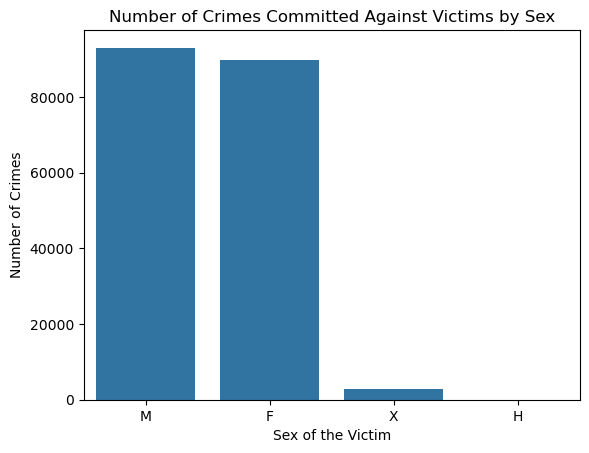

In [62]:
# Get the count plot to see distribution of crime wrt victim's sex
sns.countplot(data=crimes_clean_for_vict_sex, x="Vict Sex", order=crimes_clean_for_vict_sex['Vict Sex'].value_counts().index)
plt.title('Number of Crimes Committed Against Victims by Sex')
plt.xlabel('Sex of the Victim')
plt.ylabel('Number of Crimes')
plt.show()

Overall, the number of crime victims who are male is slightly greater than the number of female crime victims.

In [53]:
# Get the number of various types of crime description
print('Crime Categories Count: ', len(crimes['Crm Cd Desc'].unique()))

Crime Categories Count:  104


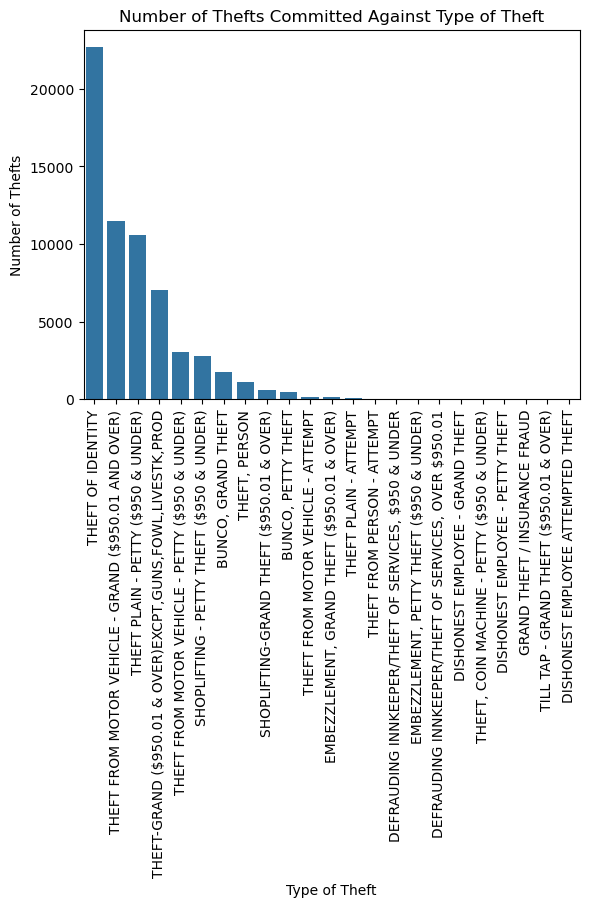

In [60]:
# Filter crimes where the description contains 'theft' (case-insensitive)
theft_crimes = crimes[crimes['Crm Cd Desc'].str.contains('theft', case=False, na=False)]
# Produce a countplot to find the largest frequency of crimes by theft
sns.countplot(data=theft_crimes, x="Crm Cd Desc", order=theft_crimes['Crm Cd Desc'].value_counts().index)
plt.title('Number of Thefts Committed Against Type of Theft')
plt.xlabel('Type of Theft')
plt.ylabel('Number of Thefts')
plt.xticks(rotation=90)
plt.show()

Most common form of theft in LA is Identity theft (Seriously, it is not a joke!!).

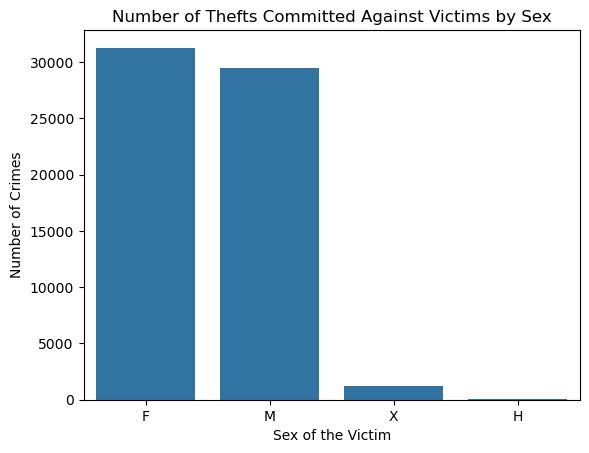

In [63]:
# Remove the missing entries in Vict sex column of theft dataframe 
theft_clean_for_vict_sex = theft_crimes.dropna(subset=['Vict Sex'])
# Get the count plot to see distribution of crime wrt victim's sex
sns.countplot(data=theft_clean_for_vict_sex, x="Vict Sex", order=theft_clean_for_vict_sex['Vict Sex'].value_counts().index)
plt.title('Number of Thefts Committed Against Victims by Sex')
plt.xlabel('Sex of the Victim')
plt.ylabel('Number of Crimes')
plt.show()

When it comes to theft-related crimes, females are more frequently victimized than males.

In [9]:
## Which hour has the highest frequency of crimes?
# Extract the first two digits from "TIME OCC", representing the hour, and convert to integer data type
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)

# Preview the DataFrame to confirm the new column is correct
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC,Age Bracket
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,26-34
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,55-64
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,26-34
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6,35-44
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9,65+


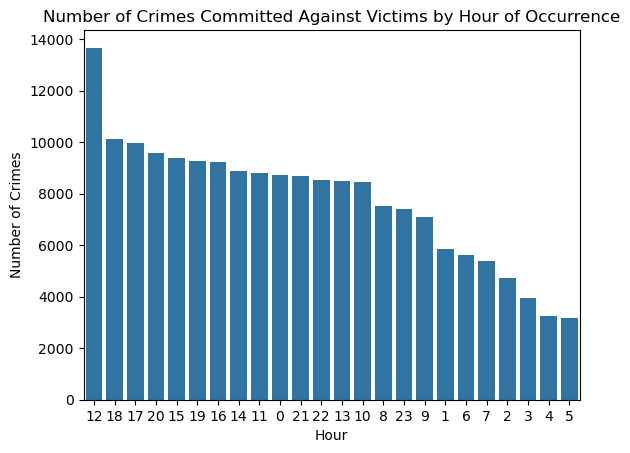

In [66]:
# Produce a countplot to find the largest frequency of crimes by hour
sns.countplot(data=crimes, x="HOUR OCC", order=crimes['HOUR OCC'].value_counts().index)
plt.title('Number of Crimes Committed Against Victims by Hour of Occurrence')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.show()

# Midday has the largest volume of crime
peak_crime_hour = 12

The number of crime events during 12pm-1pm is the highest. Least amount of crime occurs during 5am - 6am

In [12]:
## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 
# Filter for the night-time hours
# 0 = midnight; 3 = crimes between 3am and 3:59am, i.e., don't include 4
night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]

# Group by "AREA NAME" and count occurrences, filtering for the largest value and saving the "AREA NAME"
peak_night_crime_location = night_time.groupby("AREA NAME", as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC", ascending=False).iloc[0]["AREA NAME"]

# Print the peak night crime location
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")

The area with the largest volume of night crime is Central


In [64]:
night_time.groupby("AREA NAME", as_index=False)["DR_NO"].count().sort_values("DR_NO", ascending=False)

,AREA NAME,DR_NO
1,Central,3312
6,Hollywood,2699
0,77th Street,2558
15,Southwest,2347
14,Southeast,2218
9,Newton,2142
11,Olympic,2137
12,Pacific,1916
13,Rampart,1860
8,N Hollywood,1855


In [19]:
## Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+) 
# Create bins and labels for victim age ranges
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"], bins=age_bins, labels=age_labels)

# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64


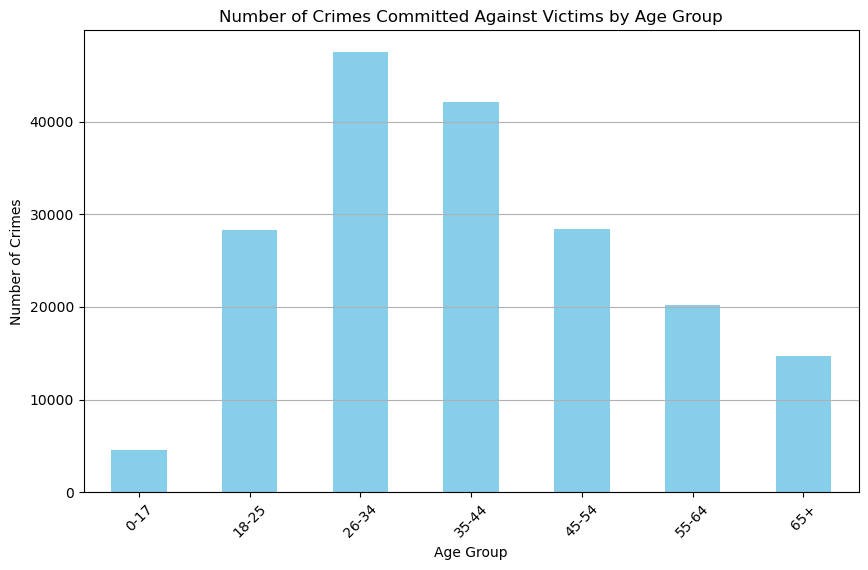

In [14]:
import matplotlib.pyplot as plt

# Sort the victim_ages Series to match the order of age_labels
victim_ages_sorted = victim_ages.reindex(age_labels)

# Create the bar plot
plt.figure(figsize=(10,6))
victim_ages_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes Committed Against Victims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
